In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, roc_auc_score, recall_score,
    precision_score, f1_score, RocCurveDisplay)

### Logistic Regression

In [4]:
df = pd.read_csv('../data/clean_train.csv')

In [70]:
X = df.drop(columns = ['branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'employee_code_id', 'loan_default'])

y = df['loan_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [71]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

pipe_params = {
    'lr__penalty': ['l1', 'l2', 'elasticnet', None],
    'lr__warm_start': [True, False]
}

gs_lr = GridSearchCV(pipe,
                 param_grid=pipe_params,
                 n_jobs = -1)

gs_lr.fit(X_train, y_train)
print(gs_lr.best_score_)
gs_lr.best_params_

C:\Users\David\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, 

0.7829354073142138


{'lr__penalty': 'l2', 'lr__warm_start': True}

* Accuracy

In [9]:
print(f' Training Accuracy Score: {gs_lr.score(X_train, y_train)}')
print(f' Test Accuracy Score: {gs_lr.score(X_test, y_test)}')

 Training Accuracy Score: 0.783146999113602
 Test Accuracy Score: 0.7816740722949441


* Misclassification

In [10]:
print(f' Training Misclassification Rate: {1 - gs_lr.score(X_train, y_train)}')
print(f' Test Misclassification Rate: {1 - gs_lr.score(X_test, y_test)}')

 Training Misclassification Rate: 0.21685300088639803
 Test Misclassification Rate: 0.21832592770505588


* Preds / F1

In [11]:
predslr = gs_lr.best_estimator_.predict(X_test)

In [12]:
f1_score(y_test, predslr)

0.0003142183817753339

- Confusion Matrix

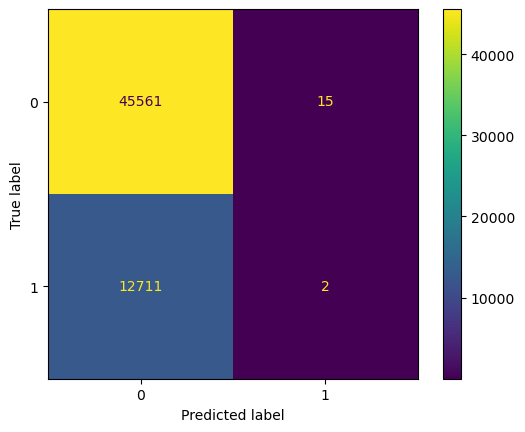

In [46]:
ConfusionMatrixDisplay.from_estimator(gs_lr.best_estimator_, X_test, y_test);

### Random Forest

In [14]:
rf = RandomForestClassifier()

rf_params = {
    'n_estimators' :[100, 150,200],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [1, 2]
}
gs_rf = GridSearchCV(rf, param_grid= rf_params, cv=5, n_jobs = -1)

gs_rf.fit(X_train, y_train)
print(gs_rf.best_score_)
gs_rf.best_params_


C:\Users\David\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\David\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\David\anaconda3\lib\site-packages

0.7832728104537786


{'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_rf = RandomizedSearchCV()

* Accuracy

In [15]:
print(f' Training Accuracy Score: {gs_rf.score(X_train, y_train)}')
print(f' Test Accuracy Score: {gs_rf.score(X_test, y_test)}')

 Training Accuracy Score: 0.7832728104537786
 Test Accuracy Score: 0.78189709893805


* Misclassification

In [16]:
print(f' Training Misclassification Score: {1 - gs_rf.score(X_train, y_train)}')
print(f' Testtest Misclassification Score: {1 - gs_rf.score(X_test, y_test)}')

 Training Misclassification Score: 0.2167271895462214
 Testtest Misclassification Score: 0.21810290106194996


* Preds / F1

In [17]:
preds_rf = gs_rf.predict(X_test)

In [18]:
f1_score(y_test, preds_rf)

0.0

- Confusion Matrix

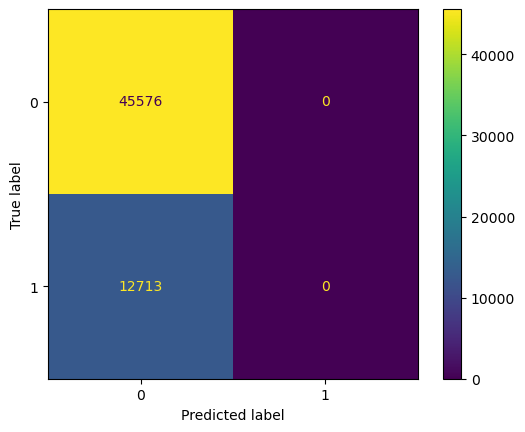

In [48]:
ConfusionMatrixDisplay.from_estimator(gs_rf.best_estimator_, X_test, y_test);

### Naive Bayes

In [29]:
nb_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('mnb', MultinomialNB())
])

nb_pipe_params = {
    'mnb__alpha':[1.0, 1.5, 2.0],
    'mnb__fit_prior': [True, False]
}

gs_nb = GridSearchCV(nb_pipe,
                    param_grid = nb_pipe_params, cv = 5,
                    n_jobs = -1)

gs_nb.fit(X_train, y_train)
print(gs_nb.best_score_)
print(gs_nb.best_params_)

C:\Users\David\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\David\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "C:\Users\David\anaconda3\lib\site-pa

ValueError: Negative values in data passed to MultinomialNB (input X)

* Accuracy

In [20]:
print(f' Training Accuracy Score: {gs_nb.score(X_train, y_train)}')
print(f' Test Accuracy Score: {gs_nb.score(X_test, y_test)}')


 Training Accuracy Score: 0.5143510708260658
 Test Accuracy Score: 0.5146768687059308


* Misclassification

In [21]:
print(f' Training Misclassification Score: {1 - gs_nb.score(X_train, y_train)}')
print(f' Testtest Misclassification Score: {1 - gs_nb.score(X_test, y_test)}')

 Training Misclassification Score: 0.4856489291739342
 Testtest Misclassification Score: 0.48532313129406923


* Preds / F1

In [24]:
preds_nb = gs_nb.predict(X_test)

In [25]:
f1_score(y_test, preds_nb)

0.36624325111454625

- Confusion Matrix

In [51]:
ConfusionMatrixDisplay.from_estimator(gs_nb.best_estimator_, X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimators_'

### Bagging

In [57]:
bagg_pipe = Pipeline([
    ('bagg', BaggingClassifier())
])

bagg_pipe_params = {
    'bagg__n_estimators':[10, 15, 20],
    'bagg__max_samples': [1, 2, 3],
    'bagg__max_features': [1, 2, 3, 4]
}

gs_bagg = GridSearchCV(bagg_pipe,
                    param_grid = bagg_pipe_params, cv = 5,
                    n_jobs = -1)

gs_bagg.fit(X_train, y_train)
print(gs_bagg.best_score_)
print(gs_bagg.best_params_)

0.7832728104537786
{'bagg__max_features': 1, 'bagg__max_samples': 1, 'bagg__n_estimators': 10}


* Accuracy

In [58]:
print(f' Training Accuracy Score: {gs_bagg.score(X_train, y_train)}')
print(f' Test Accuracy Score: {gs_bagg.score(X_test, y_test)}')

 Training Accuracy Score: 0.7832728104537786
 Test Accuracy Score: 0.78189709893805


* Missclassification

In [59]:
print(f' Training Misclassification Score: {1 - gs_bagg.score(X_train, y_train)}')
print(f' Test Misclassification Score: {1 - gs_bagg.score(X_test, y_test)}')

 Training Misclassification Score: 0.2167271895462214
 Test Misclassification Score: 0.21810290106194996


* Preds / F1 Score

In [60]:
preds_bagg = gs_bagg.predict(X_test)

In [61]:
f1_score(y_test, preds_bagg)

0.0

- Confusion Matrix

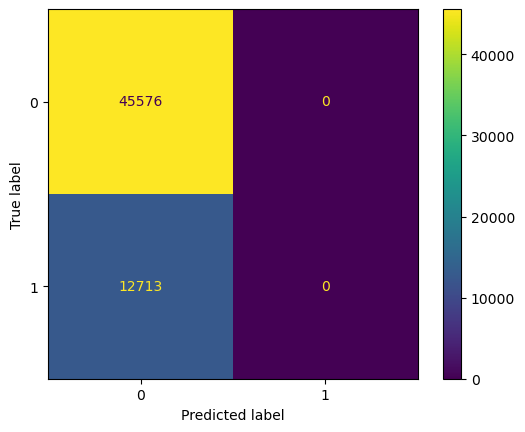

In [63]:
ConfusionMatrixDisplay.from_estimator(gs_bagg.best_estimator_, X_test, y_test);

### AdaBoost

In [31]:
ada_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ada', AdaBoostClassifier())
])

ada_pipe_params = {
    'ada__n_estimators':[50, 100, 150, 200],
    'ada__learning_rate': [1.0, 1.5, 2.0]
}

gs_ada = GridSearchCV(ada_pipe,
                    param_grid = ada_pipe_params, cv = 5,
                    n_jobs = -1)

gs_ada.fit(X_train, y_train)
print(gs_ada.best_score_)
print(gs_ada.best_params_)

0.7832670917564979
{'ada__learning_rate': 1.0, 'ada__n_estimators': 100}


* Accuracy

In [32]:
print(f' Training Accuracy Score: {gs_ada.score(X_train, y_train)}')
print(f' Test Accuracy Score: {gs_ada.score(X_test, y_test)}')

 Training Accuracy Score: 0.7832899665456209
 Test Accuracy Score: 0.7818799430424266


* Misclassification

In [33]:
print(f' Training Misclassification Score: {1 - gs_ada.score(X_train, y_train)}')
print(f' Testtest Misclassification Score: {1 - gs_ada.score(X_test, y_test)}')

 Training Misclassification Score: 0.21671003345437911
 Testtest Misclassification Score: 0.21812005695757342


* Preds / F1

In [34]:
preds_ada = gs_ada.predict(X_test)

In [35]:
f1_score(y_test, preds_ada)

0.0

### Stacking

In [26]:
level1_estimators = [
    ('nb', gs_nb.best_estimator_),
    ('ada', gs_ada.best_estimator_),
    ('rf', gs_rf.best_estimator_)
]

stacked_model = StackingClassifier(estimators=level1_estimators,
                                 final_estimator=LogisticRegression())

NameError: name 'gs_ada' is not defined

In [ ]:
stacked_model.fit(X_train, y_train)

* Accuracy

In [ ]:
print(f' Training Accuracy Score: {stacked_model.score(X_train, y_train)}')
print(f' Test Accuracy Score: {stacked_model.score(X_test, y_test)}')

* Misclassification

In [ ]:
print(f' Training Misclassification Score: {1 - stacked_model.score(X_train, y_train)}')
print(f' Testtest Misclassification Score: {1 - stacked_model.score(X_test, y_test)}')

* Preds / F1

In [ ]:
preds_stacked_model = stacked_model.predict(X_test)

In [ ]:
f1_score(y_test, preds_stacked_model)

In [64]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,mobileno_avl_flag,...,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default,employment_self,employment_none,age_at_disbursal,average_acct_age_months,credit_history_length_months,cns_score_category,cns_score_unreliable
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,...,0,0,0,0,0,34,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,...,1,0,1,1,0,33,23,23,9,0
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,...,0,0,0,1,0,33,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,...,0,1,1,1,0,25,8,15,12,0
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,...,0,1,1,1,0,41,0,0,0,0
